In [13]:
import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pickle
import numpy as np
#%matplotlib inline

#show animations inline (jupyter notebook)
#%matplotlib nbagg

%matplotlib notebook

In [14]:
use_gpu = True if torch.cuda.is_available() else False

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [15]:
def save_noise(num_images):
    noise, _ = model.buildNoiseData(num_images)
    with open('test.pickle', mode='wb') as f:
        pickle.dump(noise, f)

In [16]:
def load_noise():
    with open('test.pickle', mode='rb') as f:
        test_noise = pickle.load(f)
    return test_noise

In [17]:
def get2noise(noise):
    noise_list = []
    for i in noise:
        noise_list.append(i)
        if len(noise_list) == 2:
            break
    return noise_list

In [18]:
save_noise(64)
noise = load_noise()

n2 = get2noise(noise)

In [19]:
# fig, ax = plt.subplots()
# xdata, ydata = [], []
# ln, = plt.plot([], [], 'ro')

# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return ln,

# def update(frame):
#     xdata.append(frame)
#     ydata.append(np.sin(frame))
#     ln.set_data(xdata, ydata)
#     return ln,

# ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
#                     init_func=init, blit=True)
# plt.show()

In [20]:
class two_vecor():

    def __init__(self,model,ns):
        self.vec1 = ns[0]
        self.vec2 = ns[1]
        self.model = model
        img_cur = self.model.test(torch.stack(ns))[0].permute(1,2,0).cpu().numpy()
        img_cur = np.clip(np.rint((img_cur + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)
#         h_img.set_data(img_cur)
        #plt.imshow(img_cur)   
    
    def gen_img(self, step):
#         fig, ax = plt.subplots()
        noise_list = []
        if type(step) is float:
            r = (1 - step) * self.vec1 + step * self.vec2
        else:
            step = step["new"]
            r = (1 - step) * self.vec1 + step * self.vec2
        noise_list.append(r)
        img = self.model.test(torch.stack(noise_list))
        trans_img = img[0].permute(1,2,0).cpu().numpy()
        trans_img = np.clip(np.rint((trans_img + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)
        plt.clf()
        plt.imshow(trans_img)

In [21]:
n2 = get2noise(noise)
tmp = two_vecor(model, n2)

In [22]:
def gen_img(step):
    n2 = get2noise(noise)
    #plt.clf()
    noise_list = []
    #print(step)
    r = (1 - step) * n2[0] + step * n2[1]
    noise_list.append(r)
    img = model.test(torch.stack(noise_list))
    trans_img = img[0].permute(1,2,0).cpu().numpy()
    trans_img = np.clip(np.rint((trans_img + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)
#     plt.imshow(trans_img)
    return trans_img

<IPython.core.display.Javascript object>


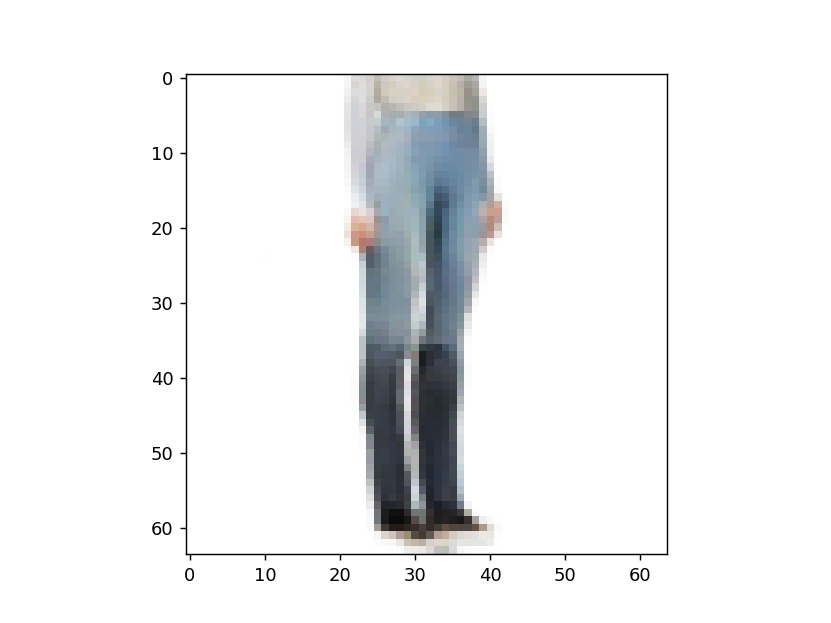

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [24]:
import matplotlib.animation as animation

#figオブジェクトを作る
fig = plt.figure()
ims = []
test_list = []

step = 0.

step_array = np.arange(0.0,1.0,0.05)

for i in range(len(step_array)):
    im = gen_img(step_array[i])
    test_list.append(im)
    ims.append([plt.imshow(im)])
    step += 0.1
    #print(step)
#     plt.imshow(im)
#     plt.show()
    
# print(len(test_list))
# print(test_list[0].shape)
# print((test_list[0] == test_list[1]).all())

#plt.imshow(im)
ani = animation.ArtistAnimation(fig,ims, interval=400, repeat_delay=1000)
# 10msごとにplot関数を呼び出してアニメーションを作成
#ani = FuncAnimation(fig, gen_img, interval=10, blit=True)
#ani.save('sample2.gif', writer='imagemagick')
plt.show()